# Linear Regression with Statsmodels and Scikit-Learn

Let's investigate the housing dataset with linear regression. Here's the documentation for `statsmodels` (in case you need it):
* statsmodels -- [linear regression](http://statsmodels.sourceforge.net/devel/examples/#regression)

## Intro to Statsmodels

Statsmodels is a python package that provides access to many useful statistical calculations and models such as linear regression. It has some advantages over `scikit-learn`, in particular easier access to various statistical aspects of linear regression.

First let's load and explore our dataset, then we'll see how to use statsmodels. We'll use `sklearn` to provide the data.

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets
data = datasets.load_boston()

print (data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Let's take a minute to see what the data looks like.

In [32]:
print (data.feature_names)
print (data.data[0])
print (data.target[0])


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
24.0


Scikit-learn has already split off the house value data into the target variable. Let's see how to build a linear regression. First let's put the data into a data frame for convenience, and do a quick check to see that everything loaded correctly.

In [33]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
# Put the target (housing value -- MEDV) in another DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print (df.head())
print (targets.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


Now let's fit a linear model to the data. First let's take a look at some of the variables we identified visually as being linked to house value, RM and LSTAT. Let's look at each individually and then both together.

Note that statsmodels does not add a constant term by default, so you need to use `X = sm.add_constant(X)` if you want a constant term.

In [34]:
import statsmodels.api as sm

X = df["RM"]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Mon, 12 Dec 2016   Prob (F-statistic):          3.74e-256
Time:                        18:29:51   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000         3.548     3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting the Coefficients

Here the coefficient of 3.634 means that as the `RM` variable increases by 1, the predicted value of `MDEV` increases by 3.634.

Let's plot the predictions versus the actual values.

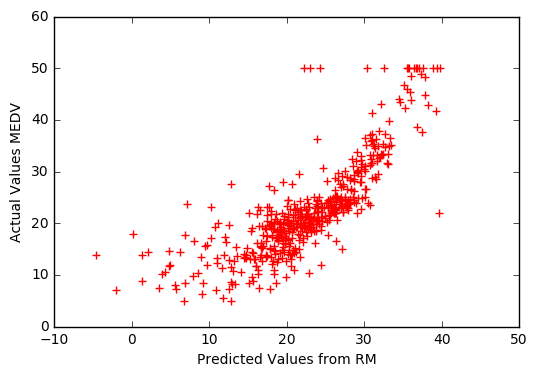

MSE: 142090.70278


In [54]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print ("MSE:", model.mse_model)

**Check**: How does this plot relate to the model? In other words, how are the independent variable (RM) and dependent variable ("MEDV") incorporated?

Solution: They are used to make the predicted values (the x-axis)

Let's try it with a constant term now.

In [36]:
## With a constant

import statsmodels.api as sm

X = df["RM"]
X = sm.add_constant(X)
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 12 Dec 2016   Prob (F-statistic):           2.49e-74
Time:                        18:30:00   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-37-9f5cfe20f2a0>, line 6)

### Interpreting the Coefficients

With the constant term the coefficients are different. Without a constant we are forcing our model to go through the origin, but now we have a y-intercept at -34.67. We also changed the slope of the `RM` regressor from 3.634 to 9.1021.

Next let's try a different predictor, `LSTAT`.


In [38]:
X = df[["LSTAT"]]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     410.9
Date:                Mon, 12 Dec 2016   Prob (F-statistic):           2.71e-67
Time:                        18:30:17   Log-Likelihood:                -2182.4
No. Observations:                 506   AIC:                             4367.
Df Residuals:                     505   BIC:                             4371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LSTAT          1.1221      0.055     20.271      0.000         1.013     1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

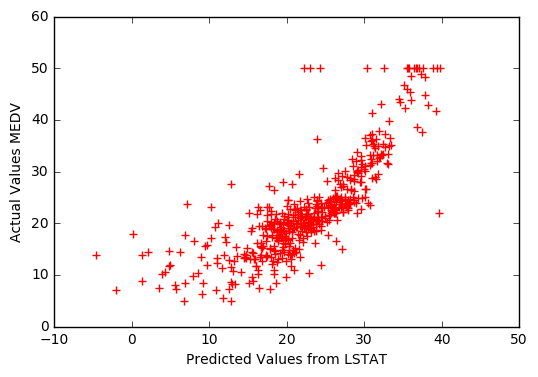

MSE: 142090.70278


In [55]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print ("MSE:", model.mse_model)

Finally, let's fit a model using both `RM` and `LSTAT`.

In [40]:
X = df[["RM", "LSTAT"]]
y = targets["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Mon, 12 Dec 2016   Prob (F-statistic):               0.00
Time:                        18:30:24   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000         4.769     5.045
LSTAT         -0.6557      0.031    -21.458      0.000        -0.716    -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

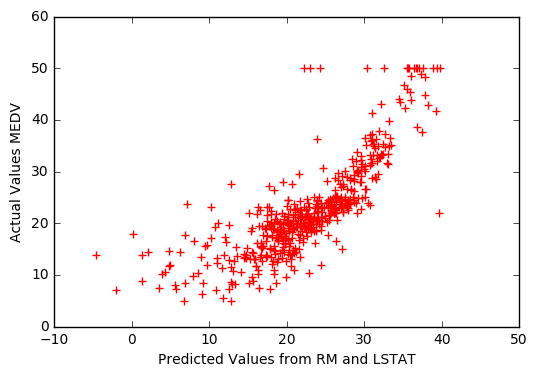

MSE: 142090.70278


In [42]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print ("MSE:", model.mse_model)

## Comparing the models

A perfect fit would yield a straight line when we plot the predicted values versus the true values. We'll quantify the goodness of fit soon.

### Exercis
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
plte

Run the fit on all the variables with `X = df`. Did this improve the fit versus the previously tested variable combinations? (Use mean squared error).

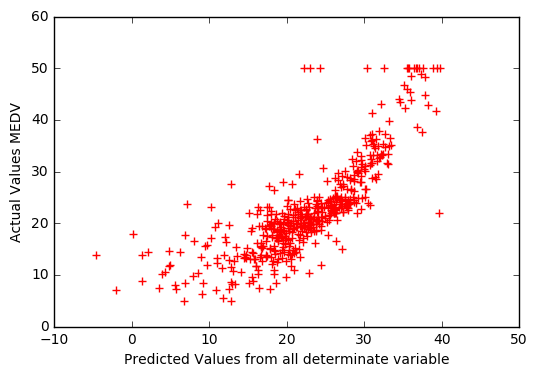

In [43]:

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all determinate variable")
plt.ylabel("Actual Values MEDV")
plt.show()

## Preparing data with Patsy

`Patsy` is a python package that makes preparing data a bit easier. It uses a special formula syntax to create the `X` and `y` matrices we use to fit our models with.

Let's look at a few examples. To get the `X` and `y` matrices for the previous example, try the following.

In [44]:
import patsy

# First let's add the targets to our data frame
df["MEDV"] = targets["MEDV"]

y, X = patsy.dmatrices("MEDV ~ RM + LSTAT", data=df)
print (X[0:5, :])
print (y[0:5, :])

[[ 1.     6.575  4.98 ]
 [ 1.     6.421  9.14 ]
 [ 1.     7.185  4.03 ]
 [ 1.     6.998  2.94 ]
 [ 1.     7.147  5.33 ]]
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]]


We can also apply functions to our data in the formula. For example, to perform a quadratic regression of "MEDV" with "LSTAT", we would use the following formula.

In [49]:
y, X = patsy.dmatrices("MEDV ~ LSTAT + I(LSTAT**2)", data=df)
print (X[0:5, :])

[[  1.       4.98    24.8004]
 [  1.       9.14    83.5396]
 [  1.       4.03    16.2409]
 [  1.       2.94     8.6436]
 [  1.       5.33    28.4089]]


You can use some python functions, like `numpy`'s power.

In [50]:
y, X = patsy.dmatrices("MEDV ~ LSTAT + np.power(LSTAT,2)", data=df)
print (X[0:5, :])

[[  1.       4.98    24.8004]
 [  1.       9.14    83.5396]
 [  1.       4.03    16.2409]
 [  1.       2.94     8.6436]
 [  1.       5.33    28.4089]]


Patsy can also handle categorical variables and make dummy variables for you.

In [51]:
from patsy import dmatrix, demo_data

data = demo_data("a", nlevels=4)
print (data)
dmatrix("a", data)

{'a': ['a1', 'a2', 'a3', 'a4', 'a1', 'a2', 'a3', 'a4']}


DesignMatrix with shape (8, 4)
  Intercept  a[T.a2]  a[T.a3]  a[T.a4]
          1        0        0        0
          1        1        0        0
          1        0        1        0
          1        0        0        1
          1        0        0        0
          1        1        0        0
          1        0        1        0
          1        0        0        1
  Terms:
    'Intercept' (column 0)
    'a' (columns 1:4)

## Guided Practice

### Exercises

Practice using patsy formulas and fit models for
* CRIM and INDUS versus MDEV (price)
* AGE and CHAS (categorical) versus MDEV

In [52]:
y, X = patsy.dmatrices("MEDV ~ CRIM + INDUS", data=df)
print (X[0:5, :])
print (y[0:5, :])

[[  1.00000000e+00   6.32000000e-03   2.31000000e+00]
 [  1.00000000e+00   2.73100000e-02   7.07000000e+00]
 [  1.00000000e+00   2.72900000e-02   7.07000000e+00]
 [  1.00000000e+00   3.23700000e-02   2.18000000e+00]
 [  1.00000000e+00   6.90500000e-02   2.18000000e+00]]
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]]


In [53]:
y, X = patsy.dmatrices("MEDV ~ AGE + CHAS", data=df)
print (X[0:5, :])
print (y[0:5, :])

[[  1.   65.2   0. ]
 [  1.   78.9   0. ]
 [  1.   61.1   0. ]
 [  1.   45.8   0. ]
 [  1.   54.2   0. ]]
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]]


## Independent Practice

Try to find the best models that you can that:
* use only two variables
* only three variables
* only four variables

Evaluate your models using the squared error. Which has the lowest? How do the errors compare to using all the variables?

### Exercise

From the LSTAT plot you may have noticed that the relationship is not quite linear. Add a new column `"LSTAT2"` to your data frame for the LSTAT values squared and try to fit a quadratic function using `["LSTAT", "LSTAT2"]`. Is the resulting fit better or worse?

## Bonus

We'll go over using Scikit-Learn later this week, but you can get a head start now by repeating some of the exercises using `sklearn` instead of `statsmodels`.

### Exercises

Recreate the model fits above with `scikit-learn`:
* a model using LSTAT
* a model using RM and LSTAT
* a model using all the variables

Compare the mean squared errors for each model between the two packages. Do they differ significantly? Why or why not?